<a href="https://colab.research.google.com/github/yesalgado/Archivos_CSV/blob/main/Cuadernos_de_trabajo/Revisar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Analisis de datos
import pandas as pd #para la creación del dataframe y limpieza de los datos
import sklearn #para los algoritmos de aprendizaje automático
import sklearn.metrics as metrics #para la medición de los algoritmos
import matplotlib.pyplot as plt #librería gráfica básica
import pickle #para grabar y recuperar los modelos entrenados
import os

# Modelo y preprocesamiento
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Librerias de gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.express as px
import scipy as sp
from scipy import stats

# Configuración warnings
import warnings
warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

# Libreria para serializar
import pickle

In [2]:
url = "https://raw.githubusercontent.com/l3t022/Clase_Analitica/main/csv/"


In [3]:
archivo = "vehicles1.csv"

In [4]:
PredCar = pd.read_csv(url+archivo) #los datos están separados por comas
PredCar #vista del dataframe

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,posting_date
0,7316356412,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al,2021-05-03T14:02:03-0500
1,7315039307,0,2011.0,jeep,compass,excellent,NaN,gas,99615.0,clean,automatic,NaN,full-size,SUV,NaN,al,2021-04-30T16:35:11-0500
2,7314560853,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,al,2021-04-29T17:19:18-0500
3,7313406529,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,al,2021-04-27T12:20:01-0500
4,7312847466,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,al,2021-04-26T11:15:36-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84242,7303227528,12995,2016.0,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,fwd,compact,sedan,silver,wy,2021-04-07T11:58:09-0600
84243,7303114896,32999,2014.0,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,4wd,full-size,pickup,brown,wy,2021-04-07T09:06:54-0600
84244,7303112347,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,fwd,mid-size,sedan,black,wy,2021-04-07T09:03:17-0600
84245,7302963673,18000,2005.0,chevrolet,silverado 1500 lt 4x4,excellent,8 cylinders,gas,130000.0,lien,automatic,4wd,full-size,truck,blue,wy,2021-04-06T21:04:03-0600


In [5]:
PredCar.info() #visualizacion de los tipos de datos del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84247 entries, 0 to 84246
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            84247 non-null  int64  
 1   price         84247 non-null  int64  
 2   year          84247 non-null  float64
 3   manufacturer  81014 non-null  object 
 4   model         83634 non-null  object 
 5   condition     84247 non-null  object 
 6   cylinders     81113 non-null  object 
 7   fuel          84247 non-null  object 
 8   odometer      84247 non-null  float64
 9   title_status  84247 non-null  object 
 10  transmission  84234 non-null  object 
 11  drive         80160 non-null  object 
 12  size          84247 non-null  object 
 13  type          81709 non-null  object 
 14  paint_color   81038 non-null  object 
 15  state         84247 non-null  object 
 16  posting_date  84247 non-null  object 
dtypes: float64(2), int64(2), object(13)
memory usage: 10.9+ MB


In [6]:
PredCar.drop_duplicates(inplace=True)  #eliminar duplicados

In [7]:
PredCar['year'] = PredCar['year'].astype(int) #convertir de float64 a int64

In [8]:
PredCar['posting_date'] = pd.to_datetime(PredCar['posting_date'], utc=True) #convertir de object a fecha

In [9]:
PredCar.isnull().sum().sort_values()

id                 0
size               0
title_status       0
state              0
fuel               0
odometer           0
year               0
price              0
condition          0
posting_date       0
transmission      13
model            613
type            2538
cylinders       3134
paint_color     3209
manufacturer    3233
drive           4087
dtype: int64

In [10]:
PredCar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84247 entries, 0 to 84246
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   id            84247 non-null  int64              
 1   price         84247 non-null  int64              
 2   year          84247 non-null  int64              
 3   manufacturer  81014 non-null  object             
 4   model         83634 non-null  object             
 5   condition     84247 non-null  object             
 6   cylinders     81113 non-null  object             
 7   fuel          84247 non-null  object             
 8   odometer      84247 non-null  float64            
 9   title_status  84247 non-null  object             
 10  transmission  84234 non-null  object             
 11  drive         80160 non-null  object             
 12  size          84247 non-null  object             
 13  type          81709 non-null  object             
 14  paint_

In [11]:
PredCar.year.unique()

array([2013, 2011, 2004, 2012, 2001, 2017, 2003, 2008, 2005, 2018, 2019,
       2006, 2014, 2009, 2002, 2016, 2007, 2015, 2010, 2020])

In [12]:
PredCar.posting_date.unique()

<DatetimeArray>
['2021-05-03 19:02:03+00:00', '2021-04-30 21:35:11+00:00',
 '2021-04-29 22:19:18+00:00', '2021-04-27 17:20:01+00:00',
 '2021-04-26 16:15:36+00:00', '2021-04-24 23:39:59+00:00',
 '2021-04-22 00:26:56+00:00', '2021-04-16 15:40:58+00:00',
 '2021-04-13 22:05:44+00:00', '2021-04-13 16:20:25+00:00',
 ...
 '2021-04-07 20:42:53+00:00', '2021-04-07 20:42:54+00:00',
 '2021-04-07 20:42:51+00:00', '2021-04-07 20:42:50+00:00',
 '2021-04-07 20:18:57+00:00', '2021-04-07 17:58:09+00:00',
 '2021-04-07 15:06:54+00:00', '2021-04-07 15:03:17+00:00',
 '2021-04-07 03:04:03+00:00', '2021-04-05 21:18:42+00:00']
Length: 79328, dtype: datetime64[ns, UTC]

In [13]:
PredCar = PredCar.drop(columns=["id", "posting_date","fuel","condition"])
PredCar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84247 entries, 0 to 84246
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         84247 non-null  int64  
 1   year          84247 non-null  int64  
 2   manufacturer  81014 non-null  object 
 3   model         83634 non-null  object 
 4   cylinders     81113 non-null  object 
 5   odometer      84247 non-null  float64
 6   title_status  84247 non-null  object 
 7   transmission  84234 non-null  object 
 8   drive         80160 non-null  object 
 9   size          84247 non-null  object 
 10  type          81709 non-null  object 
 11  paint_color   81038 non-null  object 
 12  state         84247 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 9.0+ MB


In [14]:
PredCar.select_dtypes(include=['float64', 'int']).describe()

,price,year,odometer
count,8.424700e+04,84247.000000,8.424700e+04
mean,6.203435e+04,2010.849158,1.221422e+05
std,1.289064e+07,4.840334,1.968535e+05
min,0.000000e+00,2001.000000,0.000000e+00
25%,4.995000e+03,2007.000000,7.430200e+04
50%,9.395000e+03,2011.000000,1.146000e+05
75%,1.799500e+04,2015.000000,1.545580e+05
max,3.736929e+09,2020.000000,9.999999e+06


In [15]:
PredCar=PredCar[PredCar.year < 2020] #Se eliminan valores de "year" > 2019
PredCar.year.unique()

array([2013, 2011, 2004, 2012, 2001, 2017, 2003, 2008, 2005, 2018, 2019,
       2006, 2014, 2009, 2002, 2016, 2007, 2015, 2010])

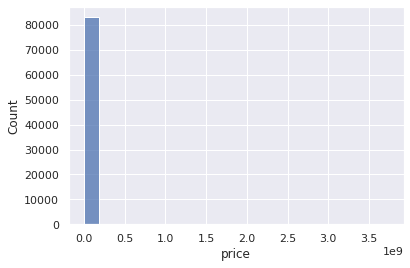

In [16]:
# Histograma variable 'price'
sns.set(style="darkgrid")

sns.histplot(data=PredCar, x="price", kde=False, bins=20)
plt.show()

In [17]:
PredCar=PredCar[PredCar.price > 950] #Se eliminan valores de "price" < 2019
PredCar.price.unique()

array([15000, 19900, 14000, ..., 11589,  3670, 27294])

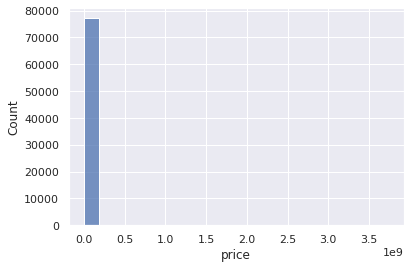

In [18]:
# Histograma variable 'price'
sns.set(style="darkgrid")

sns.histplot(data=PredCar, x="price", kde=False, bins=20)
plt.show()

In [19]:
PredCar[PredCar.price < 30000].shape

(69455, 13)

In [20]:
PredCar[PredCar.price > 950].shape

(77151, 13)

In [21]:
PredCar=PredCar[(PredCar.price < 30000) & (PredCar.price > 950 )]
PredCar.shape

(69455, 13)

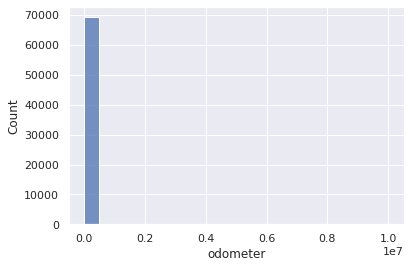

In [22]:
# Histograma variable 'odometer'
sns.set(style="darkgrid")

sns.histplot(data=PredCar, x="odometer", kde=False, bins=20)
plt.show()

In [23]:
PredCar[PredCar.odometer < 1000].shape

(570, 13)

In [24]:
PredCar[PredCar.odometer > 300000].shape

(541, 13)

In [25]:
PredCar=PredCar[(PredCar.odometer < 300000) & (PredCar.odometer >= 1000 )]
PredCar.shape

(68301, 13)

In [26]:
PredCar.select_dtypes(include=['float64', 'int']).describe()

,price,year,odometer
count,68301.000000,68301.000000,68301.000000
mean,11059.177684,2010.022064,124788.274344
std,7122.517024,4.520242,54189.951684
min,951.000000,2001.000000,1000.000000
25%,5500.000000,2007.000000,87533.000000
50%,8995.000000,2010.000000,122700.000000
75%,15000.000000,2014.000000,160000.000000
max,29999.000000,2019.000000,299852.000000


In [27]:
PredCar.select_dtypes(include=['object']).describe()

,manufacturer,model,cylinders,title_status,transmission,drive,size,type,paint_color,state
count,65989,67825,65840,68301,68293,64951,68301,66310,65771,68301
unique,38,8536,8,6,3,3,4,13,12,51
top,ford,f-150,4 cylinders,clean,automatic,fwd,full-size,sedan,white,ca
freq,11732,1365,25441,63908,63859,27466,36129,21012,15278,7399


In [28]:
PredCar.isna().sum().sort_values()

price              0
year               0
odometer           0
title_status       0
size               0
state              0
transmission       8
model            476
type            1991
manufacturer    2312
cylinders       2461
paint_color     2530
drive           3350
dtype: int64

In [29]:
PredCar.isnull().sum().sort_values()

price              0
year               0
odometer           0
title_status       0
size               0
state              0
transmission       8
model            476
type            1991
manufacturer    2312
cylinders       2461
paint_color     2530
drive           3350
dtype: int64

In [30]:
PredCar.cylinders.value_counts()

4 cylinders     25441
6 cylinders     23143
8 cylinders     15798
5 cylinders       724
10 cylinders      363
other             211
3 cylinders       135
12 cylinders       25
Name: cylinders, dtype: int64

In [31]:
PredCar[PredCar.cylinders == '4 cylinders'].shape

(25441, 13)

In [32]:
PredCar=PredCar[(PredCar.cylinders != '3 cylinders') & (PredCar.cylinders != '5 cylinders') & (PredCar.cylinders != '10 cylinders') & (PredCar.cylinders != '12 cylinders') & (PredCar.cylinders != 'other')]
PredCar.shape

(66843, 13)

In [33]:
PredCar.type.value_counts()

sedan          20592
SUV            18114
truck           8413
pickup          4461
hatchback       3144
coupe           2827
van             2140
mini-van        1861
convertible     1376
wagon           1363
other            336
offroad          177
bus               89
Name: type, dtype: int64

In [34]:
PredCar[PredCar.type == 'sedan'].shape

(20592, 13)

In [35]:
PredCar=PredCar[(PredCar.type != 'bus') & (PredCar.type != 'truck') & (PredCar.type != 'offroad') & (PredCar.type != 'other')]
PredCar.shape

(57828, 13)

In [36]:
PredCar.manufacturer.value_counts()

ford               8514
chevrolet          6828
toyota             5371
honda              4753
nissan             3520
jeep               2167
dodge              2017
subaru             1938
bmw                1889
hyundai            1805
gmc                1568
mercedes-benz      1407
kia                1398
volkswagen         1391
chrysler           1367
lexus              1125
cadillac            939
mazda               914
buick               885
audi                864
ram                 785
acura               680
infiniti            611
lincoln             545
pontiac             516
mini                454
mitsubishi          372
saturn              336
volvo               300
mercury             275
rover               268
jaguar              165
fiat                117
porsche             117
harley-davidson      21
alfa-romeo           13
land rover            5
Name: manufacturer, dtype: int64

In [37]:
#PredCar= PredCar[(PredCar.manufacturer != 'ford') & (PredCar.manufacturer != 'chevrolet') & (PredCar.manufacturer != 'toyota') & (PredCar.manufacturer != 'honda')]
#PredCar.shape

In [38]:
PredCar=PredCar[(PredCar.manufacturer != 'mercury') & (PredCar.manufacturer != 'rover') & (PredCar.manufacturer != 'jaguar') & (PredCar.manufacturer != 'fiat') 
& (PredCar.manufacturer != 'porsche') & (PredCar.manufacturer != 'harley-davidson') & (PredCar.manufacturer != 'alfa-romeo') & (PredCar.manufacturer != 'land rover')]
PredCar.shape

(56847, 13)

In [39]:
PredCar.model.value_counts()

camry                     650
accord                    623
civic                     576
f-150                     522
altima                    512
                         ... 
susburban lt 4x4            1
mistubishi lancer           1
xts premium collection      1
1500 ecodiesel              1
matrix 4wd                  1
Name: model, Length: 7284, dtype: int64

In [40]:
PredCar.model.unique().tolist()

['f250 super duty',
 'odyssey',
 'charger rt 4dr sedan',
 'town & country',
 'grand cherokee laredo',
 'tlx',
 'rx350',
 'gx470',
 'thunderbird',
 'echo',
 'blazer',
 'yukon xl',
 'accord',
 'miata mx-5',
 'impala',
 'altima 3.5 sl',
 'benz c350',
 'pathfinder',
 'q7',
 'trax',
 'eclipse',
 'prius',
 'scion ia',
 'camry',
 'charger',
 'solara',
 'ex35',
 'prius v hybrid',
 'rogue sv',
 'trailblazer',
 'sorento lx',
 'f150 regular cab xl',
 'fj cruiser 4x4',
 'benz ml 450',
 'grand am gt 1',
 'f-250 super duty xl',
 'cr-v ex-l',
 'accent',
 'escape hev',
 'accord crosstour exl',
 '1500 express',
 'tl',
 'sonata',
 'escalade',
 'cherokee sport',
 'a3 tdi premium plus',
 'sx4 se',
 'camry xle',
 'express',
 'transit connect',
 'transit 150',
 '3i',
 'commander sport',
 '1500 slt',
 'wrangler unlimited sahara',
 'wrangler',
 'sonic lt',
 'altima 2.5 s',
 'f-150',
 'maxima',
 '4runner limited',
 'tacoma',
 'silverado 1500 lt',
 '4runner 4wd',
 'econoline cargo van',
 'cr-v lx',
 'cx-9 touri

In [41]:
PredCar= PredCar[(PredCar.manufacturer == 'ford') + (PredCar.manufacturer == 'chevrolet') + (PredCar.manufacturer == 'toyota')+ (PredCar.manufacturer == 'honda')]
PredCar.shape

(25466, 13)

In [42]:
PredCar.model.unique().tolist()

['f250 super duty',
 'odyssey',
 'thunderbird',
 'echo',
 'blazer',
 'accord',
 'impala',
 'trax',
 'prius',
 'camry',
 'solara',
 'prius v hybrid',
 'trailblazer',
 'f150 regular cab xl',
 'fj cruiser 4x4',
 'f-250 super duty xl',
 'cr-v ex-l',
 'escape hev',
 'accord crosstour exl',
 'camry xle',
 'express',
 'transit connect',
 'transit 150',
 'sonic lt',
 'f-150',
 '4runner limited',
 'tacoma',
 'silverado 1500 lt',
 '4runner 4wd',
 'econoline cargo van',
 'cr-v lx',
 'silverado classic',
 'tahoe z71',
 'avalon',
 'sienna xle',
 'camaro 2ss',
 'tahoe lt',
 'ssr',
 'f350 super duty',
 'silverado',
 'civic exl',
 'corolla le',
 'malibu ls',
 'edge sel',
 'escape',
 'civic',
 'focus',
 'tahoe',
 'yaris',
 'camaro ss',
 '4runner sr5',
 'e250',
 'cobalt',
 'taurus',
 'traverse l t',
 'tundra crewmax',
 'five hundred',
 'sport trac',
 'fusion se',
 'express 2500',
 'econoline cargo',
 'escape sel',
 'explorer',
 'escape se 4wd',
 'impala lt',
 'silverado 1500',
 'malibu lt',
 'pilot ex',

In [43]:
PredCar.isna().sum().sort_values()

price              0
year               0
manufacturer       0
odometer           0
title_status       0
size               0
state              0
transmission       4
model            117
cylinders        861
type             990
paint_color     1103
drive           1245
dtype: int64

In [44]:
PredCar['drive'] = PredCar['drive'].fillna(method='ffill')
PredCar['paint_color'] = PredCar['paint_color'].fillna(method='ffill')
PredCar['cylinders'] = PredCar['cylinders'].fillna(method='ffill')
PredCar['type'] = PredCar['type'].fillna(method='ffill')
PredCar['model'] = PredCar['model'].fillna(method='ffill')
PredCar['transmission'] = PredCar['transmission'].fillna(method='ffill')

In [45]:
PredCar.isna().sum().sort_values()

price           0
year            0
manufacturer    0
model           0
cylinders       0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [46]:
PredCar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25466 entries, 2 to 84244
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         25466 non-null  int64  
 1   year          25466 non-null  int64  
 2   manufacturer  25466 non-null  object 
 3   model         25466 non-null  object 
 4   cylinders     25466 non-null  object 
 5   odometer      25466 non-null  float64
 6   title_status  25466 non-null  object 
 7   transmission  25466 non-null  object 
 8   drive         25466 non-null  object 
 9   size          25466 non-null  object 
 10  type          25466 non-null  object 
 11  paint_color   25466 non-null  object 
 12  state         25466 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 2.7+ MB


In [47]:
PredCar.head(20)

,price,year,manufacturer,model,cylinders,odometer,title_status,transmission,drive,size,type,paint_color,state
2,19900,2004,ford,f250 super duty,8 cylinders,88000.0,clean,automatic,4wd,full-size,pickup,blue,al
3,14000,2012,honda,odyssey,6 cylinders,95000.0,clean,automatic,fwd,full-size,mini-van,silver,al
18,21250,2002,ford,thunderbird,8 cylinders,15996.0,clean,automatic,fwd,compact,convertible,yellow,al
20,4000,2002,toyota,echo,4 cylinders,155000.0,clean,automatic,fwd,compact,sedan,blue,al
21,3000,2004,chevrolet,blazer,6 cylinders,131500.0,clean,automatic,4wd,mid-size,SUV,white,al
23,2500,2008,honda,accord,6 cylinders,204561.0,clean,automatic,fwd,full-size,sedan,silver,al
32,1200,2005,chevrolet,impala,4 cylinders,256806.0,clean,automatic,fwd,mid-size,sedan,blue,al
42,17000,2019,chevrolet,trax,4 cylinders,14898.0,clean,automatic,4wd,full-size,SUV,grey,al
44,8900,2013,toyota,prius,4 cylinders,142900.0,clean,automatic,fwd,mid-size,wagon,blue,al
46,4000,2002,toyota,camry,4 cylinders,160000.0,clean,automatic,fwd,full-size,sedan,white,al


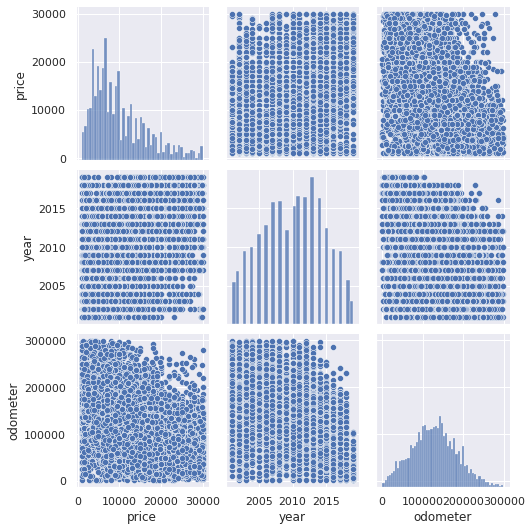

In [48]:
sns.pairplot(PredCar)

In [49]:
categoria = PredCar.columns
numerico = ['price', 'year', 'odometer']
categorical = PredCar.drop(numerico, axis=1)
numerical = PredCar[numerico]
categorical.head()

,manufacturer,model,cylinders,title_status,transmission,drive,size,type,paint_color,state
2,ford,f250 super duty,8 cylinders,clean,automatic,4wd,full-size,pickup,blue,al
3,honda,odyssey,6 cylinders,clean,automatic,fwd,full-size,mini-van,silver,al
18,ford,thunderbird,8 cylinders,clean,automatic,fwd,compact,convertible,yellow,al
20,toyota,echo,4 cylinders,clean,automatic,fwd,compact,sedan,blue,al
21,chevrolet,blazer,6 cylinders,clean,automatic,4wd,mid-size,SUV,white,al


In [50]:
numerical.head()

,price,year,odometer
2,19900,2004,88000.0
3,14000,2012,95000.0
18,21250,2002,15996.0
20,4000,2002,155000.0
21,3000,2004,131500.0


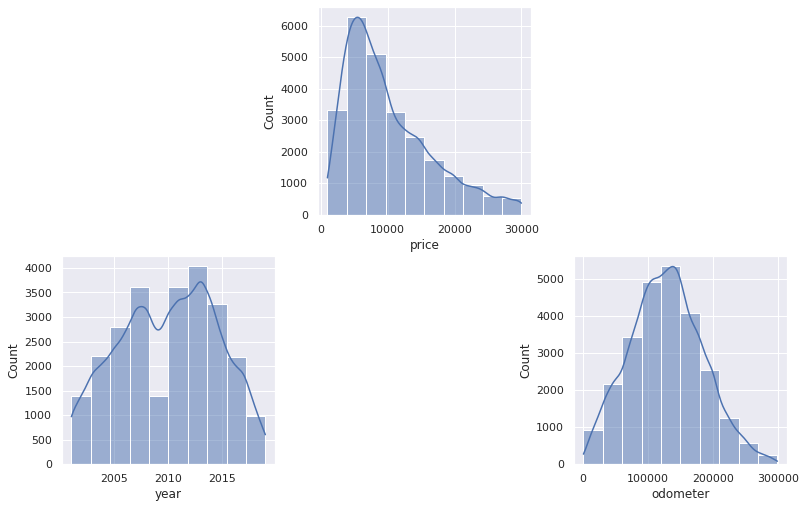

In [51]:
sns.set(style="darkgrid")

fig=plt.figure(figsize=(13,13))
axes=330

for nun in numerical:
    axes += 2
    fig.add_subplot(axes)
    #setting titulos de num
    sns.histplot(data = numerical, x=nun, kde=True, bins=10) 
plt.show()

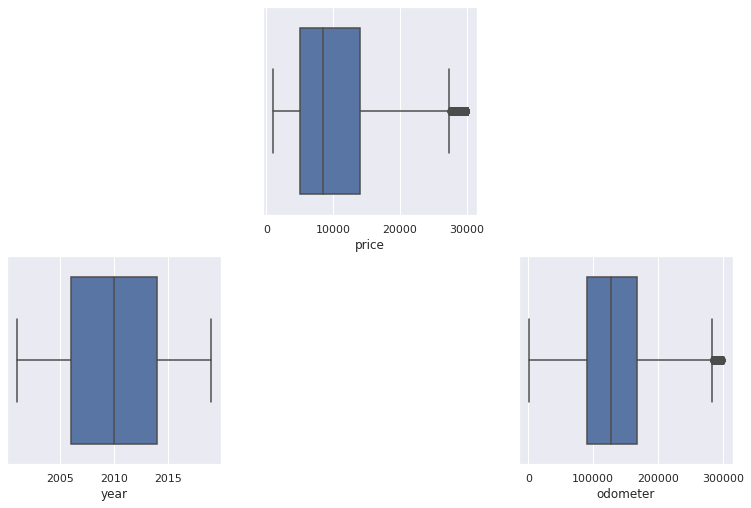

In [52]:
sns.set(style="darkgrid")

fig=plt.figure(figsize=(13,13))
axes=330

for num in numerical:
    axes += 2
    fig.add_subplot(axes)
    #setting titulos de num
    sns.boxplot(data = numerical, x=num)
plt.show()

In [53]:
PredCar.model.value_counts()

camry                652
accord               625
civic                577
f-150                529
escape               465
                    ... 
super duty e-250       1
prius c one            1
tacoma pre runner      1
pilot ll               1
corolla camry          1
Name: model, Length: 2233, dtype: int64

In [54]:
import sklearn 
from sklearn.preprocessing import LabelEncoder

In [55]:
convertir = LabelEncoder()

In [56]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25466 entries, 2 to 84244
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   manufacturer  25466 non-null  object
 1   model         25466 non-null  object
 2   cylinders     25466 non-null  object
 3   title_status  25466 non-null  object
 4   transmission  25466 non-null  object
 5   drive         25466 non-null  object
 6   size          25466 non-null  object
 7   type          25466 non-null  object
 8   paint_color   25466 non-null  object
 9   state         25466 non-null  object
dtypes: object(10)
memory usage: 3.4+ MB


In [57]:
PredCar.manufacturer = PredCar.manufacturer.apply(str) #0
PredCar.model = PredCar.model.apply(str)               #1
PredCar.cylinders = PredCar.cylinders.apply(str)       #2
PredCar.title_status = PredCar.title_status.apply(str) #3
PredCar.transmission = PredCar.transmission.apply(str) #4
PredCar.drive = PredCar.drive.apply(str)               #5
PredCar['size'] = PredCar['size'].apply(str)             #6 AttributeError: 'numpy.int64' object has no attribute 'apply' (size es una propiedad!)
PredCar.type = PredCar.type.apply(str)                 #7
PredCar.paint_color = PredCar.paint_color.apply(str)   #8
PredCar.state = PredCar.state.apply(str)               #9

In [58]:
PredCar.insert(4,column="nummodel",value=convertir.fit_transform(PredCar.model))
PredCar.insert(6,column="numcylinders",value=convertir.fit_transform(PredCar.cylinders))
PredCar.insert(9,column="numtitle_status",value=convertir.fit_transform(PredCar.title_status))
PredCar.insert(11,column="numtransmission",value=convertir.fit_transform(PredCar.transmission))
PredCar.insert(13,column="numdrive",value=convertir.fit_transform(PredCar.drive))
PredCar.insert(15,column="numsize",value=convertir.fit_transform(PredCar['size']))
PredCar.insert(17,column="numtype",value=convertir.fit_transform(PredCar.type))
PredCar.insert(19,column="numpaint_color",value=convertir.fit_transform(PredCar.paint_color))
PredCar.insert(21,column="numstate",value=convertir.fit_transform(PredCar.state))

In [59]:
PredCar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25466 entries, 2 to 84244
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            25466 non-null  int64  
 1   year             25466 non-null  int64  
 2   manufacturer     25466 non-null  object 
 3   model            25466 non-null  object 
 4   nummodel         25466 non-null  int64  
 5   cylinders        25466 non-null  object 
 6   numcylinders     25466 non-null  int64  
 7   odometer         25466 non-null  float64
 8   title_status     25466 non-null  object 
 9   numtitle_status  25466 non-null  int64  
 10  transmission     25466 non-null  object 
 11  numtransmission  25466 non-null  int64  
 12  drive            25466 non-null  object 
 13  numdrive         25466 non-null  int64  
 14  size             25466 non-null  object 
 15  numsize          25466 non-null  int64  
 16  type             25466 non-null  object 
 17  numtype     

In [60]:
PredCar.head()

,price,year,manufacturer,model,nummodel,cylinders,numcylinders,odometer,title_status,numtitle_status,transmission,numtransmission,drive,numdrive,size,numsize,type,numtype,paint_color,numpaint_color,state,numstate
2,19900,2004,ford,f250 super duty,1132,8 cylinders,2,88000.0,clean,0,automatic,0,4wd,0,full-size,1,pickup,5,blue,1,al,1
3,14000,2012,honda,odyssey,1540,6 cylinders,1,95000.0,clean,0,automatic,0,fwd,1,full-size,1,mini-van,4,silver,9,al,1
18,21250,2002,ford,thunderbird,2046,8 cylinders,2,15996.0,clean,0,automatic,0,fwd,1,compact,0,convertible,1,yellow,11,al,1
20,4000,2002,toyota,echo,675,4 cylinders,0,155000.0,clean,0,automatic,0,fwd,1,compact,0,sedan,6,blue,1,al,1
21,3000,2004,chevrolet,blazer,212,6 cylinders,1,131500.0,clean,0,automatic,0,4wd,0,mid-size,2,SUV,0,white,10,al,1


In [62]:
datoscorrelacion = PredCar.corr()

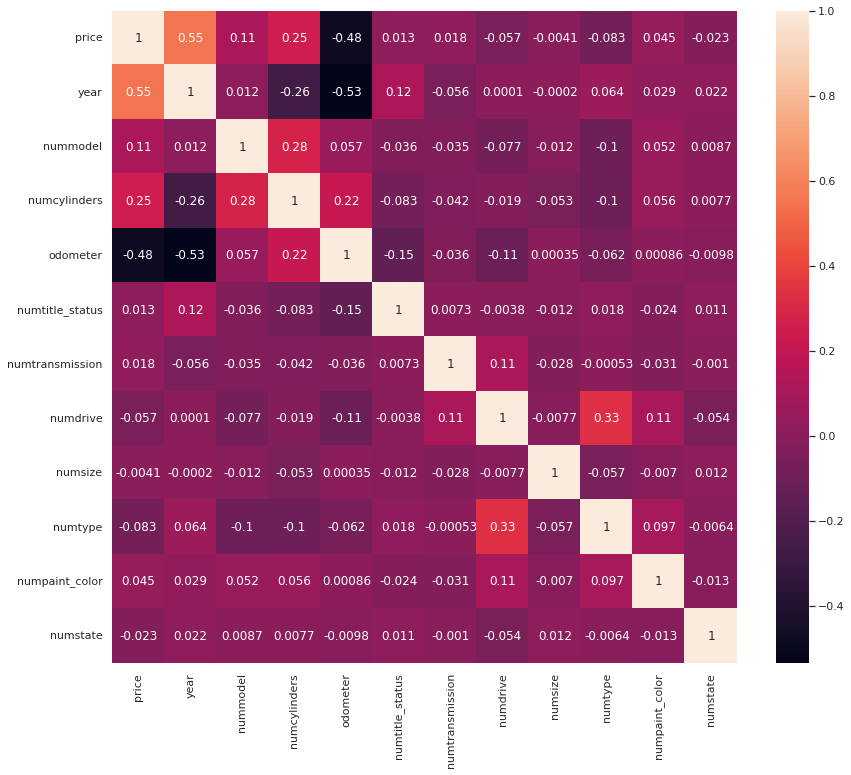

In [63]:
plt.figure(figsize=(14,12))
sns.heatmap(datoscorrelacion, annot=True)

plt.show()

In [64]:
datosPCA = PredCar

In [65]:
datosPCAstd = (datosPCA - datosPCA.mean(axis=0)) / datosPCA.std(axis=0)

In [66]:
datosPCAstd.isnull().sum()

cylinders          25466
drive              25466
manufacturer       25466
model              25466
numcylinders           0
numdrive               0
nummodel               0
numpaint_color         0
numsize                0
numstate               0
numtitle_status        0
numtransmission        0
numtype                0
odometer               0
paint_color        25466
price                  0
size               25466
state              25466
title_status       25466
transmission       25466
type               25466
year                   0
dtype: int64

In [69]:
datosPCAstd = datosPCAstd.drop(['cylinders', 'drive', 'manufacturer', 'model', 'paint_color', 'size', 'state', 'title_status',
                       'transmission', 'type'], axis = 1)

In [70]:
pca = PCA(2)
pca

PCA(n_components=2)

In [71]:
datosPCA = pca.fit_transform(datosPCAstd)

In [72]:
PCA_names = [f"PC{i+1}" for i in range(datosPCA.shape[1])]
PCA_names

['PC1', 'PC2']

In [73]:
datosPCA = pd.DataFrame(datosPCA, columns=PCA_names)
datosPCA.head()

,PC1,PC2
0,-0.011642,1.592814
1,0.829449,0.496296
2,0.597745,2.243640
3,-1.621257,-1.620913
4,-1.556183,0.201007


In [75]:
fig = px.scatter(datosPCA, x="PC1",
                 y="PC2",
                 template="gridon",
                 title="Análisis de Componentes Principales")
fig.show()

In [76]:
dfPCA = pd.DataFrame(pca.components_.T,
                    columns=PCA_names,
                    index=datosPCAstd.columns)
dfPCA

,PC1,PC2
numcylinders,-0.164232,0.494782
numdrive,0.061216,-0.409607
nummodel,-0.029240,0.453269
numpaint_color,0.034019,-0.020953
numsize,-0.000301,0.003882
numstate,0.002836,0.040509
numtitle_status,0.162461,-0.109208
numtransmission,0.010673,-0.135233
numtype,0.070574,-0.456423
odometer,-0.574376,0.056780


In [77]:
dfPCA.style.highlight_max(color = 'lightgreen')

,PC1,PC2
numcylinders,-0.164232,0.494782
numdrive,0.061216,-0.409607
nummodel,-0.029240,0.453269
numpaint_color,0.034019,-0.020953
numsize,-0.000301,0.003882
numstate,0.002836,0.040509
numtitle_status,0.162461,-0.109208
numtransmission,0.010673,-0.135233
numtype,0.070574,-0.456423
odometer,-0.574376,0.056780


In [78]:
dfPCA.style.highlight_min(color = 'lightblue')

,PC1,PC2
numcylinders,-0.164232,0.494782
numdrive,0.061216,-0.409607
nummodel,-0.029240,0.453269
numpaint_color,0.034019,-0.020953
numsize,-0.000301,0.003882
numstate,0.002836,0.040509
numtitle_status,0.162461,-0.109208
numtransmission,0.010673,-0.135233
numtype,0.070574,-0.456423
odometer,-0.574376,0.056780


In [80]:
datos1 = PredCar[['year', 'odometer', 'numtype', 'numdrive', 'numcylinders','nummodel', 'price']]
datos1 = datos1.reset_index(drop=True)  #reinicie el index del DataFrame                        # Se pudo usar: y = datos1.iloc[:,-1:]
datos1.index

RangeIndex(start=0, stop=25466, step=1)

In [81]:
datos1.head()

,year,odometer,numtype,numdrive,numcylinders,nummodel,price
0,2004,88000.0,5,0,2,1132,19900
1,2012,95000.0,4,1,1,1540,14000
2,2002,15996.0,1,1,2,2046,21250
3,2002,155000.0,6,1,0,675,4000
4,2004,131500.0,0,0,1,212,3000


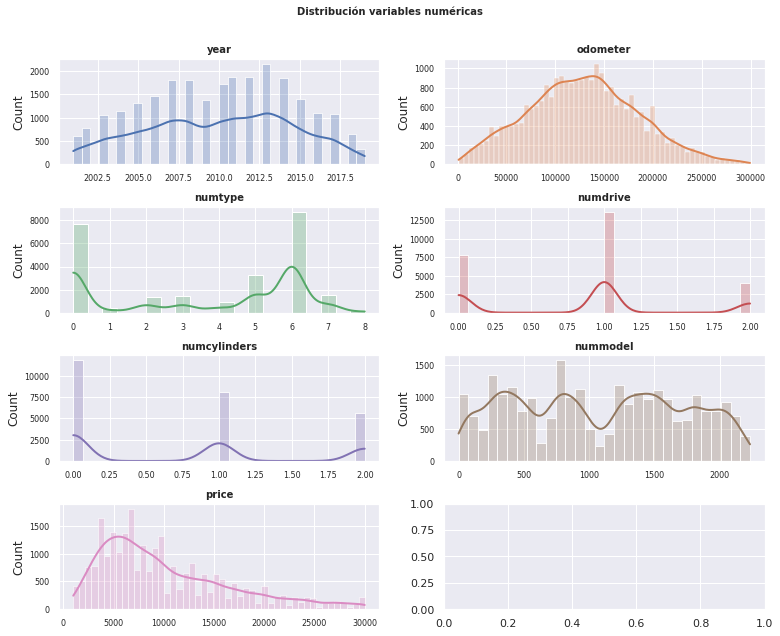

In [82]:
# Gráfico de distribución para cada variable numérica

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(11, 9))
axes = axes.flat
columnas_numeric = datos1.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(datos1.columns):
    sns.histplot(
        data    = datos1,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")

    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [83]:
X = datos1.drop(['price'], axis= 1)  # Se pudo usar: X = datos1.iloc[:,0:-1]
y = datos1['price']                  # Se pudo usar: y = datos1.iloc[:,-1:]

In [84]:
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values.reshape(-1,1),
                                                    train_size = 0.8,
                                                    random_state = 123,
                                                    shuffle = True)

In [86]:
X_train = sm.add_constant(X_train, prepend=True) # A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     4187.
Date:                Mon, 06 Dec 2021   Prob (F-statistic):               0.00
Time:                        20:19:22   Log-Likelihood:            -1.9984e+05
No. Observations:               20372   AIC:                         3.997e+05
Df Residuals:                   20365   BIC:                         3.997e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.457e+06   1.65e+04    -88.466   

In [87]:
datos2 = datosPCAstd # Normalizado
datos2 = datos2.reset_index(drop=True)  #reinicie el index del DataFrame
datos2.index

RangeIndex(start=0, stop=25466, step=1)

In [88]:
datos2.columns

Index(['numcylinders', 'numdrive', 'nummodel', 'numpaint_color', 'numsize',
       'numstate', 'numtitle_status', 'numtransmission', 'numtype', 'odometer',
       'price', 'year'],
      dtype='object')

In [89]:
x = datos2[['year', 'odometer', 'numtype', 'numdrive', 'numcylinders','nummodel']]
Y = datos2['price']

In [90]:
Y

0        1.478798
1        0.578873
2        1.684713
3       -0.946423
4       -1.098953
           ...   
25461   -1.175217
25462   -0.032008
25463    0.121132
25464    0.425581
25465    0.883780
Name: price, Length: 25466, dtype: float64

In [91]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y.values.reshape(-1,1),
                                                    train_size = 0.8,
                                                    random_state = 12345,
                                                    shuffle = True)

In [92]:
# Creación del modelo 

x_train = sm.add_constant(x_train, prepend=True) # A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
modelo1 = sm.OLS(endog=Y_train, exog=x_train,)
modelo1 = modelo1.fit()
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     4142.
Date:                Mon, 06 Dec 2021   Prob (F-statistic):               0.00
Time:                        20:20:40   Log-Likelihood:                -20709.
No. Observations:               20372   AIC:                         4.143e+04
Df Residuals:                   20365   BIC:                         4.149e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0027      0.005     -0.587   

In [93]:
# Preprocesado y modelado
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [94]:
datos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25466 entries, 0 to 25465
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          25466 non-null  int64  
 1   odometer      25466 non-null  float64
 2   numtype       25466 non-null  int64  
 3   numdrive      25466 non-null  int64  
 4   numcylinders  25466 non-null  int64  
 5   nummodel      25466 non-null  int64  
 6   price         25466 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 1.4 MB


In [95]:
# División de los datos en train y test
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        datos1.drop(columns = "price"),
                                        datos1['price'],
                                        random_state = 123
                                    )
# Creación del modelo
# ------------------------------------------------------------------------------
modelo2 = DecisionTreeRegressor(
            max_depth         = 3,
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=123)

Profundidad del árbol: 3
Número de nodos terminales: 8


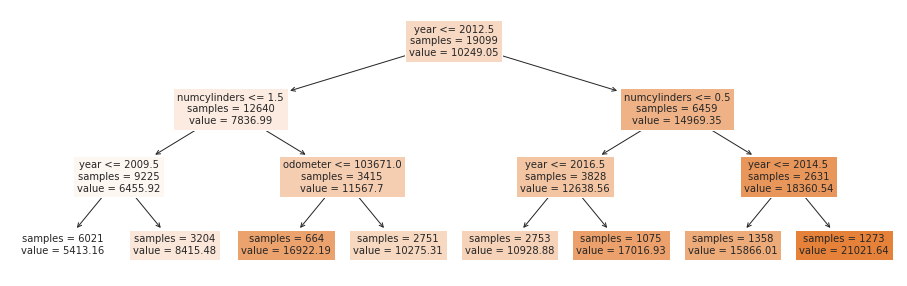

In [96]:
# Diagrama del árbol de decision
fig, ax = plt.subplots(figsize=(16, 5))

print(f"Profundidad del árbol: {modelo2.get_depth()}")
print(f"Número de nodos terminales: {modelo2.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo2,
            feature_names = datos1.drop(columns = "price").columns,
            class_names   = 'price',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [97]:
importancia_predictores = pd.DataFrame(
                            {'predictor': datos1.drop(columns = "price").columns,
                             'importancia': modelo2.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,year,0.668879
4,numcylinders,0.275152
1,odometer,0.055969
2,numtype,0.000000
3,numdrive,0.000000
5,nummodel,0.000000


In [98]:
from scipy.stats import norm
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import r2_score, mean_squared_error as mse
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import RepeatedKFold
import multiprocessing

from sklearn.metrics import mean_squared_error
from math import sqrt

In [99]:
y_pred = modelo2.predict(X_test)

# Error de la media de los cuadrados - RMSE
print(f"El error (RMSE) de test es: {sqrt(mean_squared_error(y_test, y_pred))}")
#sqrt(mean_squared_error(y_test, y_pred))

El error (RMSE) de test es: 4519.155459705487


In [100]:
# Error de la media absoluta - MAE
print(f"El error (MAE) de test es: {metrics.median_absolute_error(y_test, y_pred)}")
#metrics.median_absolute_error(y_test, y_pred)

El error (MAE) de test es: 2484.519350811486


In [101]:
# Coeficiente de determinación (R^2)
print(f"El error (R^2) de test es: {metrics.r2_score(y_test, y_pred)}")
#metrics.r2_score(y_test, y_pred)

El error (R^2) de test es: 0.5092113587094684


In [102]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

In [103]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth = 16, n_estimators = 5)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=16, n_estimators=5)

In [104]:
y_pred = rfr.predict(X_test)

In [105]:
# Error de la media de los cuadrados - RMSE
print(f"El error (RMSE) de test es: {sqrt(mean_squared_error(y_test, y_pred))}")
#sqrt(mean_squared_error(y_test, y_pred))

El error (RMSE) de test es: 2966.1384094818895


In [106]:
# Error de la media absoluta - MAE
print(f"El error (MAE) de test es: {metrics.median_absolute_error(y_test, y_pred)}")
#metrics.median_absolute_error(y_test, y_pred)

El error (MAE) de test es: 1043.833333333333


In [107]:
# Coeficiente de determinación (R^2)
print(f"El error (R^2) de test es: {metrics.r2_score(y_test, y_pred)}")
#metrics.r2_score(y_test, y_pred)

El error (R^2) de test es: 0.7885718714663696
